In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.patches as mpatches
import matplotlib
import sys
sys.path.append('../')
from functions import morse

Figure 10.1: Electron transfer from the metal to an antibonding orbital in the molecule diminishes the dissociation
energy

In [ ]:
# Distance from the surface, z
x_sigmoid = np.linspace(-5, 10, 1000)
y_sigmoid = 1/(1 + np.exp(-x_sigmoid))


R = np.arange(0.1, 10, 0.001) # Internuclear separation
r_eq = 2.7 # Equilibrium bond distance
# H+H potential
D_e = 1
b = 0.6
V_HH = morse(D_e, b, R, r_eq)
# H2 potential
D_e2 = 0.1
b_2 = 0.5
V_H2 = morse(D_e2, b_2, R, r_eq)

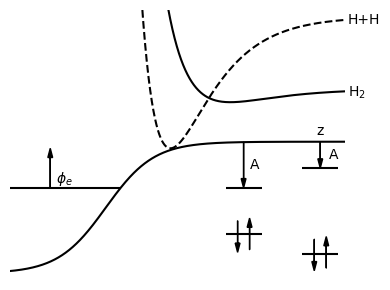

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (4, 3))

# Distance from the surface, z
ax.plot(x_sigmoid, y_sigmoid, color = 'k')
ax.text(8.95, 1.05, 'z', ha = 'center')

# Orbital diagram rigth
ax.hlines(0.8, 8.2, 9.7, color = 'k')
ax.hlines(0.15, 8.2, 9.7, color = 'k')
arrow = mpatches.FancyArrow(8.95, 1/(1 + np.exp(-8.95)), 0, -(1/(1 + np.exp(-8.95)))+0.8, 
                            length_includes_head = True, head_width = 0.2, head_length = 0.07, color = 'k')
ax.add_patch(arrow)
ax.text(9.3, 0.9, 'A', va = 'center')
arrow = mpatches.FancyArrow(8.7, 0.26, 0, -0.24, length_includes_head = True, head_width = 0.2, 
                            head_length = 0.07, color = 'k')
ax.add_patch(arrow)
arrow = mpatches.FancyArrow(9.2, 0.04, 0, 0.24, length_includes_head = True, head_width = 0.2, 
                            head_length = 0.07, color = 'k')
ax.add_patch(arrow)

# Orbital diagram left
ax.hlines(0.65, 5, 6.5, color = 'k')
ax.hlines(0.3, 5, 6.5, color = 'k')
arrow = mpatches.FancyArrow(5.75, 1/(1 + np.exp(-5.75)), 0, -(1/(1 + np.exp(-5.75)))+0.65, 
                            length_includes_head = True, head_width = 0.2, head_length = 0.07, color = 'k')
ax.add_patch(arrow)
ax.text(6, 0.825, 'A', va = 'center')
arrow = mpatches.FancyArrow(5.5, 0.4, 0, -0.24, length_includes_head = True, head_width = 0.2, 
                            head_length = 0.07, color = 'k')
ax.add_patch(arrow)
arrow = mpatches.FancyArrow(6, 0.18, 0, 0.24, length_includes_head = True, head_width = 0.2, 
                            head_length = 0.07, color = 'k')
ax.add_patch(arrow)

# Work function, phi_e
ax.hlines(0.65, -4, 0.64, color = 'k')
arrow = mpatches.FancyArrow(-2.32, 0.65, 0, 0.3, length_includes_head = True, head_width = 0.2, 
                            head_length = 0.07, color = 'k')
ax.add_patch(arrow)
ax.text(-2.1, 0.72, r'$\phi_{e}$', va = 'center')

# H+H potential
ax.plot(R, V_HH+0.95, color = 'k', ls = '--')
ax.text(10.1, 1.89, 'H+H')
# H2 potential
ax.plot(R+2.5, V_H2+1.3, color = 'k')
ax.text(10.1, 1.34, r'H$_{2}$')

ax.set_ylim(-0.05, 2)
ax.set_xlim(-4, 10)

# Remove frame and ticks from plot
plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()
plt.savefig('SurfaceHarpoon.png', dpi = 150)
plt.show()

Figure 10.2: Energetics for a dissociative chemisorption process as a function of the distance from the surface z

In [ ]:
R = np.arange(0, 7, 0.001) # Internuclear separation

# Chemisorbed dissociative
D_e_chemi = 7.5
r_eq_chemi = 1
b_chemi = 0.8
chemi = morse(D_e_chemi, b_chemi, R, r_eq_chemi) - D_e_chemi

# Physisorbed state precursor
D_e_physi = 2.2
r_eq_physi = 4.5
b_physi = 0.6
physi = morse(D_e_physi, b_physi, R, r_eq_physi) - D_e_physi

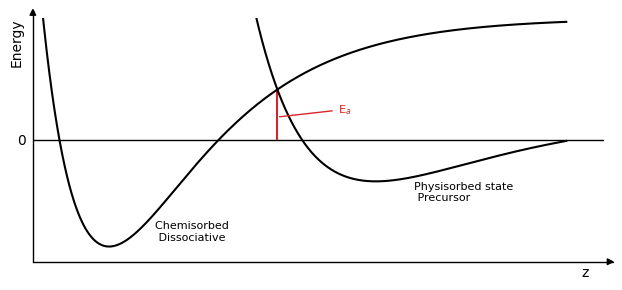

In [ ]:
fig = plt.figure(figsize = (6.3,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# Chemisorbed dissociative
ax.plot(R, chemi+8, color = 'k')
ax.text(1.6, 0.7, 'Chemisorbed \n Dissociative', fontsize = 8)
# Physisorbed state precursor
ax.plot(R, physi+4.84, color = 'k')
ax.text(5, 2, 'Physisorbed state \n Precursor', fontsize = 8)
# Zero-line
ax.hlines(4, 0, 7.5, color = 'k', zorder = -10, lw = 1)
ax.text(-0.2, 3.85, '0')
# Activation energy
ax.vlines(3.1995, 4, 5.6, color = 'tab:red', zorder = -10)
ax.annotate(r'E$_{a}$', xy = (3.2, 4.75), xytext = (4, 5), arrowprops=({'arrowstyle': '-', 'lw': 1, 
            'color':'tab:red'}), va = 'center', color = 'tab:red', fontsize = 8)

ax.text(7.2, -0.5, 'z')
ax.text(-0.3, 6.5, 'Energy', rotation = 90)

ax.set_xlim(0, 7.5)
ax.set_ylim(0, 8)

plt.tight_layout()
plt.savefig('PhysiChemi.png', dpi = 150)
plt.show()

Figure 10.3: First and second layer gas-surface adsorption

In [ ]:
# First layer of adsorbed molecules
x_1 = np.linspace(0, 1, 4)
y_1 = np.zeros(4)

# Second layer of adsorbed molecules
x_2 = np.linspace(0, 0.66, 3)
y_2 = np.zeros(3)

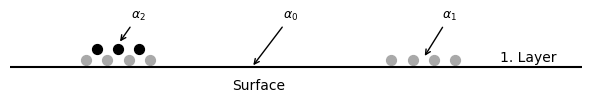

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 1.2))

# Surface
ax.hlines(0.1, 0, 10, color = 'k')

# First layer of adsorbed molecules
ax.scatter(x_1+6, y_1+0.34, marker = 'o', s = 50, color = 'darkgrey')
ax.annotate(r'$\alpha_{1}$', xy = (6.5, 0.4), xytext = (6.8, 2), arrowprops=({'arrowstyle': '->', 'lw': 1, 
            'color':'k'}), va = 'top', color = 'k', fontsize = 9)

# First and second layer of adsorbed molecules
ax.scatter(x_1+1.2, y_1+0.34, marker = 'o', s = 50, color = 'darkgrey')
ax.scatter(x_2+1.375, y_2+0.7, marker = 'o', s = 50, color = 'k')
ax.annotate(r'$\alpha_{2}$', xy = (1.705, 0.87), xytext = (1.9, 2), arrowprops=({'arrowstyle': '->', 'lw': 1, 
            'color':'k'}), va = 'top', color = 'k', fontsize = 9)

# No adsorbed molecules
ax.annotate(r'$\alpha_{0}$', xy = (3.8, 0.1), xytext = (4.3, 2), arrowprops=({'arrowstyle': '->', 'lw': 1, 
            'color':'k'}), va = 'top', color = 'k', fontsize = 9)

ax.text(3.5, -0.6, 'Surface')
ax.text(7.7, 0.3, '1. Layer')

ax.set_xlim(0, 9)
ax.set_ylim(0, 2)

# Remove frame and ticks from plot
plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout(pad = 1)
plt.savefig('SurfaceAds.png', dpi = 150)
plt.show()

Figure 10.4: BET adsorption isotherm

In [ ]:
V_ads = 0.8 # Amount of adsorbed gas
P_0 = 760 # Saturated gas vapor pressure
P = np.linspace(0, 50, 1000) # Gas phase pressure

x_values = P/P_0
y_values = P/(V_ads*(P_0-P))

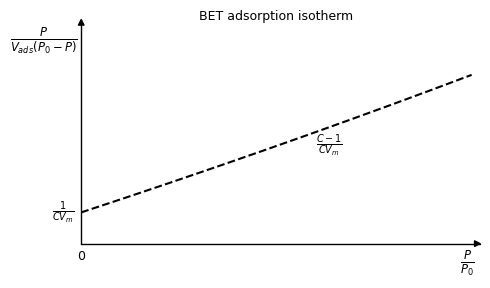

In [ ]:
fig = plt.figure(figsize = (5,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# BET adsorption isotherm
ax.plot(x_values, y_values+0.02, color = 'k', ls = '--')

# Axis labels
ax.text(-0.012, max(y_values)+0.04, r'$\frac{P}{V_{ads}(P_{0}-P)}$', fontsize = 12)
ax.text(max(x_values)-0.002, -0.015, r'$\frac{P}{P_{0}}$', fontsize = 12)
# Intercept with y-axis, 1/CV_m
ax.text(-0.005, 0.02, r'$\frac{1}{CV_{m}}$', va = 'center')
# Slope, (C-1)/(CV_m)
ax.text(x_values[600], y_values[700], r'$\frac{C-1}{CV_{m}}$')

ax.text(0, -0.01, '0', ha = 'center', fontsize = 9)

ax.set_xlim(0, max(x_values))
ax.set_ylim(0, max(y_values)+0.05)

ax.set_title('BET adsorption isotherm', fontsize = 9)

plt.tight_layout()
plt.savefig('BET.png', dpi = 150)
plt.show()

Figure 10.5: Energy profile for a one-dimensional surface diffusion process

In [ ]:
# Energy profile
x = np.linspace(np.pi, 7*np.pi, 1000)
z = np.cos(x)

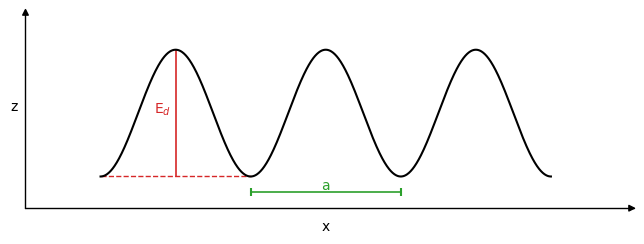

In [ ]:
fig = plt.figure(figsize = (6.5, 2.5))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# Energy profile
ax.plot(x, z+1.5, color = 'k')

# Diffusion barrier, E_d
ax.hlines(0.5, np.pi, 3*np.pi, color = 'tab:red', ls = '--', lw = 1, zorder = -10)
ax.vlines(2*np.pi, 0.49, 2.5, color = 'tab:red', lw = 1.2, zorder = -10)
ax.text(2*np.pi, 1.5, r'E$_{d}$  ', color = 'tab:red', ha = 'right')

# Distance between the wells, a
ax.scatter(3*np.pi, 0.25, color = 'tab:green', marker = '|')
ax.scatter(5*np.pi, 0.25, color = 'tab:green', marker = '|')
ax.hlines(0.25, 3*np.pi, 5*np.pi, color = 'tab:green', lw = 1.2)
ax.text(4*np.pi, 0.3, 'a', color = 'tab:green', ha = 'center')

ax.set_xlim(0, 8*np.pi)
ax.set_ylim(0, 3)

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.axis['yzero'].label.set(rotation = 'vertical')

plt.tight_layout()
plt.savefig('SurfDiff.png', dpi = 150)
plt.show()